# Exam
## Data Analysis

### import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

### import dataset

In [ ]:
df = pd.read_csv("data1.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# let's see the size of the dataset
df.shape

(12591077, 24)

In [ ]:
# let's see how the data looks
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


**The Data Set has the following fields:**

	* Invoice/Item Number
    *	Date
    *	Store Number
    *	Store Name
    *	Address
    *	City
    *	Zip Code
    *	Store Location
    *	County Number
    *	County
    *	Category Number
    *	Category Name
    *	Vendor Number - number assigned to each contractor delivering care services to medical care recipients
    *	Vendor Name
    *	Item Number
    *	Item Description
    *	Pack
    *	Bottle Volume (measured in ml)
    *	State Bottle Cost
    *	State Bottle Retail
    *	Bottles Sold
    *	Sale (measured in dollars)
    *	Volume Sold (in liters)
    *	Volume Sold(in gallons)

***The target column is Volume Sold (Liters)***

From these features in the dataset, I can see that there is no need to learn about liquor components.

In [ ]:
# display the class of the data structure, the index range, the numer of non-missing values in every column, the data type of every column, the size of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

Almost all column are object type, will need to clean them.

In [ ]:
# check for missing values
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

It looks like there is a lot of missing data.

let's see if actualy is a lot, or meaning less for the model.

In [ ]:
df['County'].isnull().sum()*100/df.shape[0]

0.6288421554407141

As we can see there is not much data missing, under a percent.

---



In [ ]:
# get the main statistical parameters fo all columns
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,1.259108e+07,1.251190e+07,1.258306e+07,1.259107e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07
mean,3.565216e+03,5.724050e+01,1.044710e+06,2.574911e+02,4.603682e+04,1.222533e+01,9.289402e+02,8.140392e+00,7.489119e+00,1.977358e+00
std,9.312721e+02,2.726983e+01,5.435094e+04,1.416175e+02,5.301684e+04,7.458673e+00,7.340448e+02,2.217891e+01,2.679149e+01,7.077822e+00
min,2.106000e+03,1.000000e+00,1.012200e+05,1.000000e+01,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,3.100000e+01,1.012210e+06,1.150000e+02,2.705600e+04,6.000000e+00,7.500000e+02,2.000000e+00,1.500000e+00,4.000000e-01
50%,3.704000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,4.000000e+00,3.000000e+00,7.900000e-01
75%,4.304000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.375500e+04,1.200000e+01,1.000000e+03,1.200000e+01,9.000000e+00,2.380000e+00
max,9.932000e+03,9.900000e+01,1.901200e+06,9.870000e+02,9.992750e+05,6.000000e+02,3.780000e+05,1.500000e+04,1.500000e+04,3.962580e+03


In [ ]:
# Displaying the number of unique names of cities
print(df['City'].nunique())

793


Top 5 cities where the most liters of liquor were sold

In [ ]:
df['City'].value_counts()[:5]

DES MOINES      811086
CEDAR RAPIDS    597416
DAVENPORT       411104
Des Moines      307692
WATERLOO        289538
Name: City, dtype: int64

The most shops are in Des Moines city and the lowest in Alvord.

In [ ]:
# converting to date type
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Printing minimum and the maximum date from dataset.
print(df['Date'].min())
print(df['Date'].max())

2012-01-03 00:00:00
2017-10-31 00:00:00


The dataset is from 2012 till 2017.

The top 5 most sold liquors by liters

In [ ]:
print(df.groupby(['Category Name'])['Volume Sold (Liters)'].sum().sort_values(ascending=False)[:5])

Category Name
VODKA 80 PROOF                      17797396.77
CANADIAN WHISKIES                   11788955.90
SPICED RUM                           6535656.32
BLENDED WHISKIES                     3943552.25
PUERTO RICO & VIRGIN ISLANDS RUM     3889666.92
Name: Volume Sold (Liters), dtype: float64


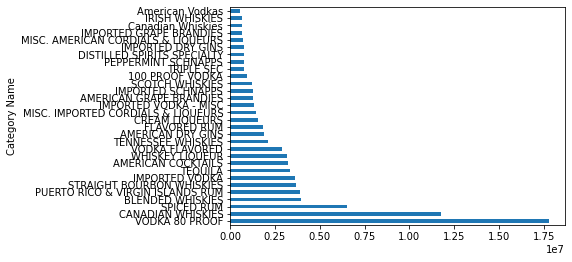

In [ ]:
(df.groupby(['Category Name'])['Volume Sold (Liters)'].sum().sort_values(ascending=False)[:30]).plot(kind='barh')

The 5 least sold liquors by liters

In [ ]:
print(df.groupby(['Category Name'])['Volume Sold (Liters)'].sum().sort_values(ascending=True)[:5])

Category Name
American Gins                            5.00
Temporary &  Specialty Packages         10.50
HIGH PROOF BEER - AMERICAN              40.50
Imported Distilled Spirit Specialty    149.67
IMPORTED VODKA - CHERRY                222.00
Name: Volume Sold (Liters), dtype: float64


The years when the most liters of liquor were sold

In [ ]:
print(df.groupby(df['Date'].dt.year)['Volume Sold (Liters)'].sum().sort_values(ascending=False))

Date
2015    19617702.47
2014    19157612.51
2012    18755279.42
2013    18576450.22
2016    14508093.43
2017     3680936.84
Name: Volume Sold (Liters), dtype: float64


Most popular bottle capacity bought

In [ ]:
(df['Bottle Volume (ml)']/1000).value_counts().head()

0.750    5719505
1.750    2550403
1.000    1787513
0.375    1224058
0.500     523506
Name: Bottle Volume (ml), dtype: int64

In [ ]:
#compute correlation table
df.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,0.005435,-0.013788,-0.003244,-0.023936,0.096067,-0.045227,-0.011310,-0.030714,-0.030737
County Number,0.005435,1.000000,-0.003929,0.000766,0.009563,0.018526,-0.018756,0.011851,0.003912,0.003916
Category,-0.013788,-0.003929,1.000000,0.090873,0.220785,-0.041507,-0.011167,0.001992,-0.003244,-0.003243
Vendor Number,-0.003244,0.000766,0.090873,1.000000,0.134647,-0.048423,0.010193,-0.002552,-0.004603,-0.004605
Item Number,-0.023936,0.009563,0.220785,0.134647,1.000000,-0.013792,-0.016774,0.001644,-0.005205,-0.005200
Pack,0.096067,0.018526,-0.041507,-0.048423,-0.013792,1.000000,-0.417754,0.080785,-0.060130,-0.060063
Bottle Volume (ml),-0.045227,-0.018756,-0.011167,0.010193,-0.016774,-0.417754,1.000000,-0.004470,0.107614,0.107539
Bottles Sold,-0.011310,0.011851,0.001992,-0.002552,0.001644,0.080785,-0.004470,1.000000,0.910107,0.910147
Volume Sold (Liters),-0.030714,0.003912,-0.003244,-0.004603,-0.005205,-0.060130,0.107614,0.910107,1.000000,1.000000
Volume Sold (Gallons),-0.030737,0.003916,-0.003243,-0.004605,-0.005200,-0.060063,0.107539,0.910147,1.000000,1.000000


## Visualizing the data

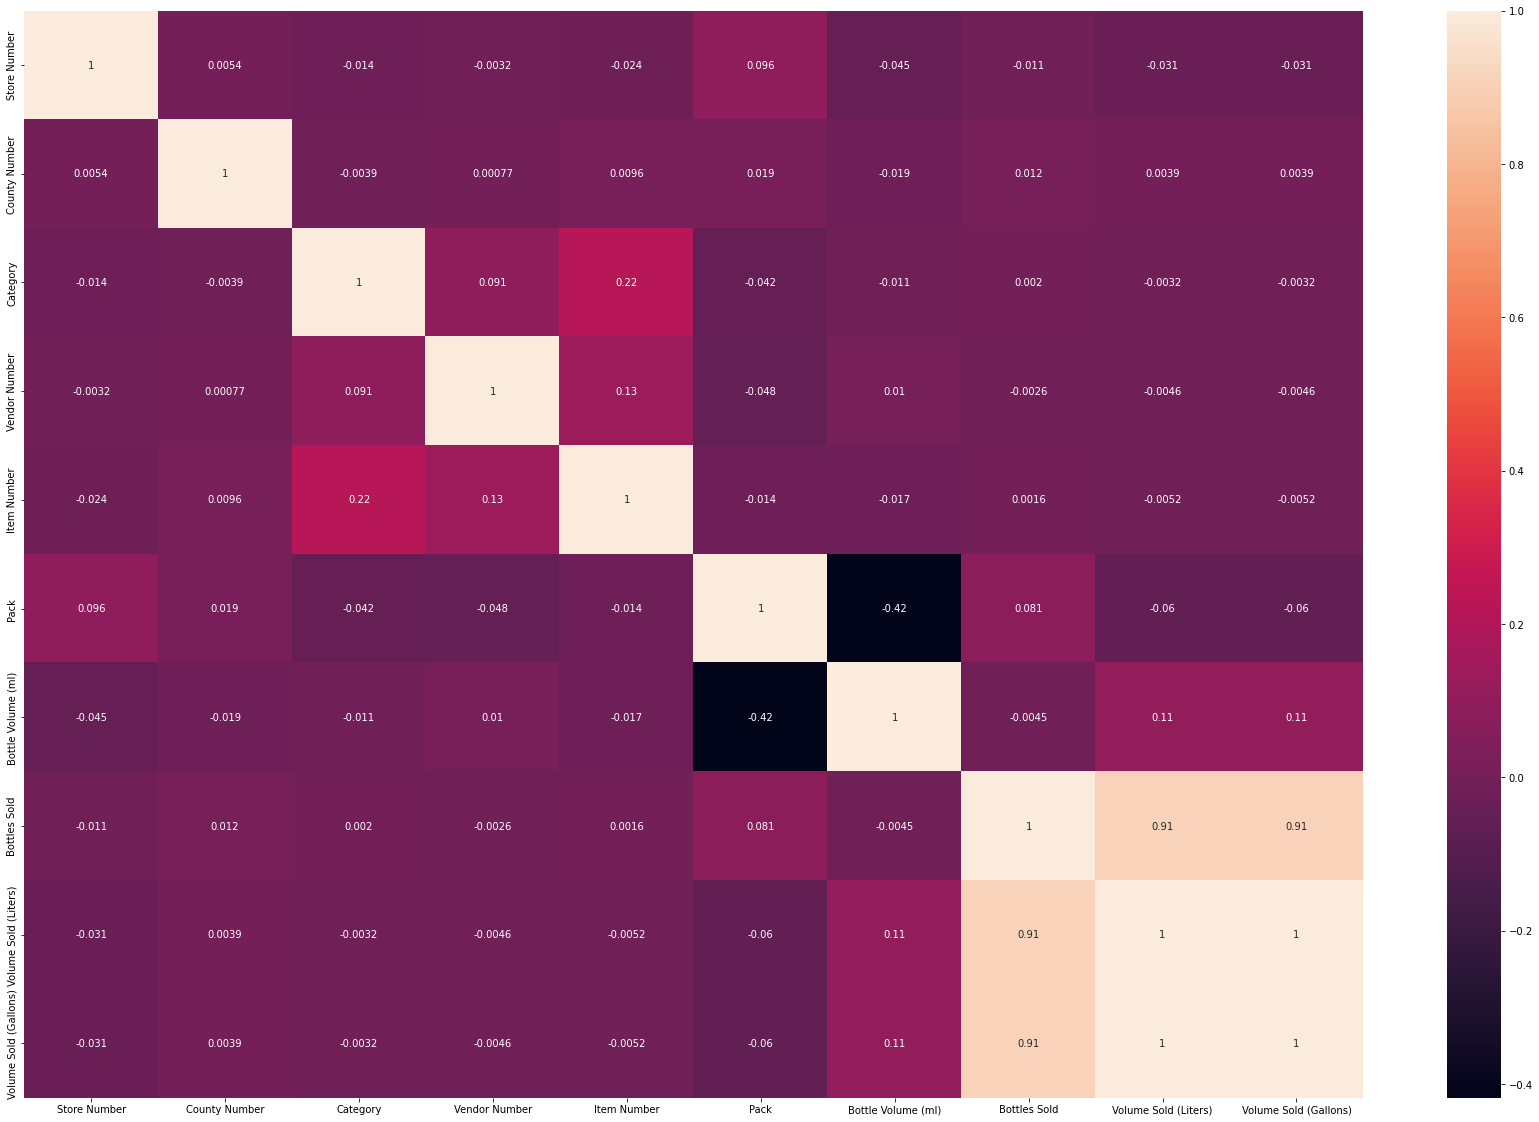

In [ ]:
plt.figure(figsize=(30,20))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

We can see that the number of bottles sold has the greatest correlation with the target column (which is obvious).

I think that more insightful data will be the non-numerical one.

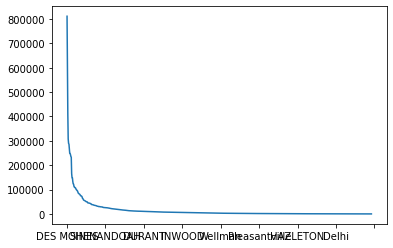

In [ ]:
df['City'].value_counts().plot()

There are few cities with a lot of shops. The majority of the cities have almost the same number of shops.

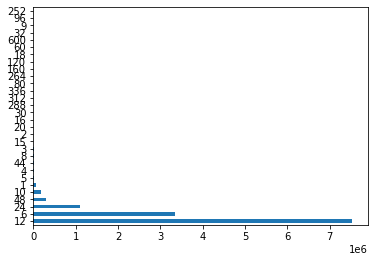

In [ ]:
df['Pack'].value_counts().plot(kind='barh')

----

with sns.axes_style('dark'):
    sns.jointplot(data=df, x='Item number', y='Bottles sold', kind='hex', height=7)